In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import regex as re
import time

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent_r')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

In [91]:
def extract_sizes_and_quantities(description):
    """
    Extract sizes and quantities of shirts from a description of the order.

    Parameters:
        description (str): Description of the order containing shirt sizes and quantities.

    Returns:
        dict: A dictionary containing the sizes as keys and their respective quantities as values.
    """
    pattern = r"(?i)\b(\d+)\s*(NP|NM|NGG?|NEXG|BLP|BLM|BLGG?|BLEXG)\b"
    matches = re.findall(pattern, description)
    sizes_quantities = {size.upper(): int(quantity) for quantity, size in matches}
    return sizes_quantities

def calculate_shirt_sizes(file_path, model):
    """
    Calculate the total quantities of each shirt size from a given Excel file.

    Parameters:
        file_path (str): Path to the Excel file.

    Returns:
        dict: A dictionary containing the total quantities of each shirt size.
    """
    if model == 'NORMAIS':
      # Read the Excel file and select the 'DESCRIÇÃO DO PEDIDO' column
      df = pd.read_excel(file_path, usecols="C", sheet_name="NORMAIS")

    elif model == 'POLOS':
      # Read the Excel file and select the 'DESCRIÇÃO DO PEDIDO' column
      df = pd.read_excel(file_path, usecols="C", sheet_name="POLOS")

    # Create a dictionary to store the quantities of each size
    sizes_quantities = {
        "NP": 0,
        "NM": 0,
        "NG": 0,
        "NGG": 0,
        "NEXG": 0,
        "BLP": 0,
        "BLM": 0,
        "BLG": 0,
        "BLGG": 0,
        "BLEXG": 0
    }

    # Process each description of the order and sum the quantities of each shirt size
    for description in df["DESCRIÇÃO DO PEDIDO"]:
        sizes_quantities_description = extract_sizes_and_quantities(str(description))
        for size, quantity in sizes_quantities_description.items():
            sizes_quantities[size] += quantity

    return sizes_quantities

def plot_shirt_histogram(sizes_quantities):
    """
    Plot a histogram of shirt models based on their quantities.

    Parameters:
        sizes_quantities (dict): A dictionary containing the total quantities of each shirt size.

    Returns:
        None
    """
    f = plt.figure(
        figsize=(14, 8)
    )

    # Convert the sizes and quantities dictionary into two separate lists
    sizes, quantities = zip(*sizes_quantities.items())

    # Create the histogram
    plt.bar(sizes, quantities)

    # Add labels and title
    plt.xlabel('Modelo', fontsize=16)
    plt.ylabel('Quantidade', fontsize=16)
    plt.title('Distribuição das Qtd. de Camisetas', fontsize=20)

    # Display the plot
    plt.show()

In [93]:
# Example usage to calculate all shirt sizes
file_path = "/content/Camisetas - Doze de 2023.xlsx"  # Replace with the actual path to your Excel file
calculated_sizes = calculate_shirt_sizes(file_path, model='NORMAIS')

# Display the final result correctly
for size, quantity in calculated_sizes.items():
    print(f"{size}: {quantity}")

NP: 3
NM: 23
NG: 12
NGG: 7
NEXG: 0
BLP: 6
BLM: 2
BLG: 3
BLGG: 0
BLEXG: 3


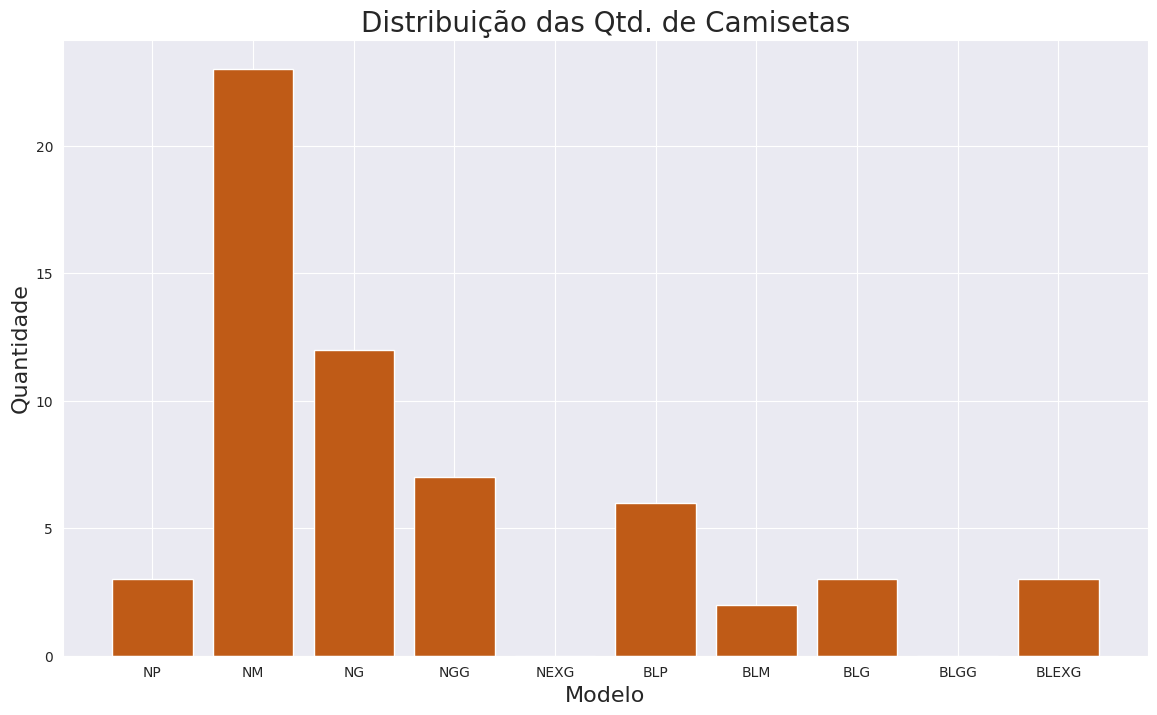

In [94]:
plot_shirt_histogram(calculated_sizes)